In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from RANSAC import RANSAC

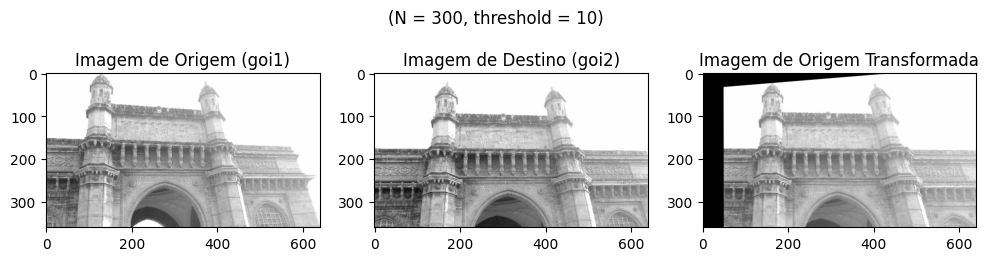

In [10]:
goi1 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/goi1.jpg',cv2.IMREAD_GRAYSCALE)
goi2 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/goi2.jpg',cv2.IMREAD_GRAYSCALE)


orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(goi1,None)
kp2, des2 = orb.detectAndCompute(goi2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

N = 300
t = 10

H = RANSAC(N, t, matches, kp1, kp2)

# Apply homography
result_img = cv2.warpPerspective(goi1, H, (goi2.shape[1], goi2.shape[0]))


plt.figure(figsize=(12, 6))
plt.suptitle(f'(N = {N}, threshold = {t})',y=0.73)

plt.subplot(1, 3, 1)
plt.imshow(goi1, cmap='gray')
plt.title('Imagem de Origem (goi1)')

plt.subplot(1, 3, 2)
plt.imshow(goi2, cmap='gray')
plt.title('Imagem de Destino (goi2)')

plt.subplot(1, 3, 3)
plt.imshow(result_img, cmap='gray')
plt.title('Imagem de Origem Transformada')
plt.show()